<a href="https://colab.research.google.com/github/MusadaqTanvir/TensforFlowCodes/blob/main/02_Neural_Network_Classification_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. Neural Network Classification with TensorFlow
Okay, we've seen how to deal with a regression problem in TensorFlow, let's look at how we can approach a classification problem.

A classification problem involves predicting whether something is one thing or another.

For example, you might want to:

* Predict whether or not someone has heart disease based on their health parameters. This is called **binary classification** since there are only two options.
* Decide whether a photo of is of food, a person or a dog. This is called **multi-class classification** since there are more than two options.
* Predict what categories should be assigned to a Wikipedia article. This is called **multi-label classification** since a single article could have more than one category assigned.

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


# Creating a data to view and fit

In [ ]:
from sklearn.datasets import make_circles

In [ ]:
# Make 1000 examples
n_samples = 1000
X, y = make_circles(n_samples,noise=0.03,random_state=42)
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X.shape

(1000, 2)

Our Data is little bit hard to understand let's visualize it

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


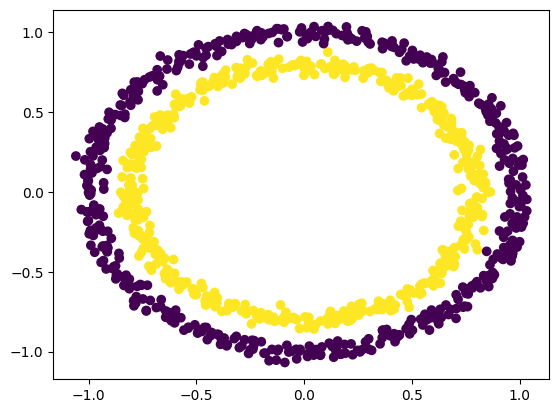

In [ ]:
# LEts visualize it
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y)

# Input and output shapes
One of the most common issues you'll run into when building neural networks is shape mismatches.

More specifically, the shape of the input data and the shape of the output data.

In our case, we want to input X and get our model to predict y.

So let's check out the shapes of X and y.

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first sample of x and y
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

Alright, so we've got two X features which lead to one y value.

This means our neural network input shape will has to accept a tensor with at least one dimension being two and output a tensor with at least one value.

🤔 **Note:** y having a shape of (1000,) can seem confusing. However, this is because all y values are actually scalars (single values) and therefore don't have a dimension. For now, think of your output shape as being at least the same value as one example of y (in our case, the output from our neural network has to be at least one value).

In [ ]:
# Creating the model
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

# Fit the Model
model.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 5.5145 - accuracy: 0.4810
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 5.4297 - accuracy: 0.4790
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3565 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 5.3048 - accuracy: 0.4750
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.2515 - accuracy: 0.4760


In [ ]:
# Let's try and improve our model to training for longer
model.fit(X,y,epochs=200,verbose=0)

In [ ]:
model.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 3.1420 - accuracy: 0.4860


[3.142001152038574, 0.4860000014305115]

Even after 200 passes of the data, it's still performing as if it's guessing.

What if we added an extra layer and trained for a little longer?

In [ ]:
tf.random.set_seed(42)

# Create the Model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='relu')
])

# Compile the Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.SGD(),metrics=['accuracy'])

# fit the model
model_2.fit(X,y,epochs=300,verbose=0)

In [ ]:
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6933503150939941, 0.5]

# Improving our Model

To improve our model, we can alter almost every part of the 3 steps we went through before.

**Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.

**Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.

**Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

#### Common ways to improve the Model
* Adding Layers
* Increase the Number of hidden units
* Change the Activation Function
* Change the Optimization Function
* Change the learning rate
* Fitting on More data
* Fitting for longer



In [ ]:
tf.random.set_seed(42)

# Creating the Model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100),
    tf.keras.layers.Dense(units=10),
    tf.keras.layers.Dense(units=1)
])

# Compile the Model
model_3.compile(loss=tf.keras.losses.MAE,optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

# Fit the Model
history = model_3.fit(X,y,epochs=100,verbose=0)

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5000 - accuracy: 0.4830


[0.5000337362289429, 0.4830000102519989]

In [ ]:
y_pred = model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions we're going to create a function plot_decision_boundary() which:

Takes in a trained model, features (X) and labels (y).
Creates a meshgrid of the different X values.
Makes predictions across the meshgrid.
Plots the predictions as well as a line between the different zones (where each unique class falls).
If this sounds confusing, let's see it in code and then see the output.

🔑 Note: If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def plot_decision_boundary(model,X,y):
  """
  This Functions Takes Model,Features and labels as input and plot the decision boundary

  """
  # Define the Axes Boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min()-0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min,x_max,100),np.linspace(y_min,y_max,100))

  # Create X values
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D array
  y_pred = model.predict(x_in)
    # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


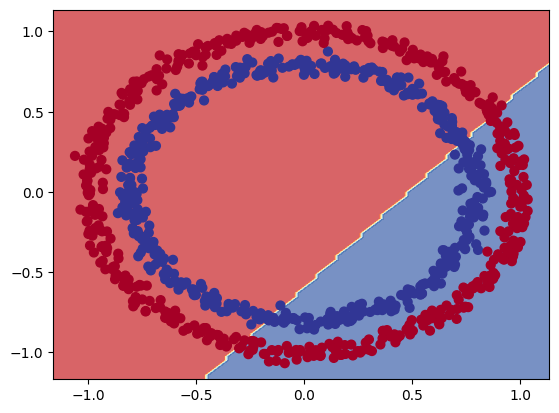

In [ ]:
plot_decision_boundary(model_3,X,y)

Looks like our model is trying to draw a straight line through the data.

What's wrong with doing this?

The main issue is our data isn't separable by a straight line.

In a regression problem, our model might work. In fact, let's try it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int64)
      • training=True
      • mask=None


Oh wait... we compiled our model for a binary classification problem.

No trouble, we can recreate it for a regression problem.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 422.8185 - mae: 422.8185
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 315.6512 - mae: 315.6512
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 210.4804 - mae: 210.4804
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 99.6239 - mae: 99.6239
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 54.3785 - mae: 54.3785
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 82.6066 - mae: 82.6066
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 65.0200 - mae: 65.0200
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 43.2965 - mae: 43.2965
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 48.8120 - mae: 48.8120
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 41.4858 - mae: 41.4858
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


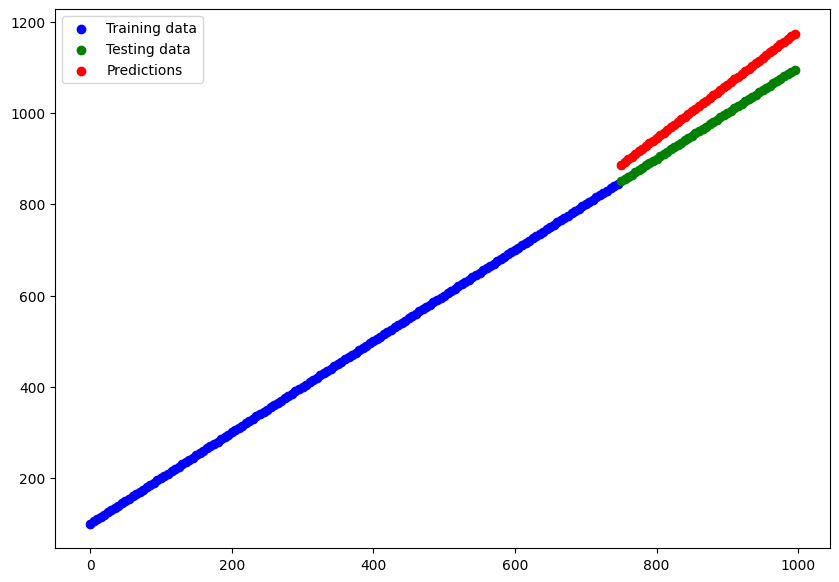

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

In [ ]:
# Ranodm seed
tf.random.set_seed(42)

# Create the Model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation=tf.keras.activations.linear)
])

# Compile the Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

# Fit the model
history = model_4.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 6.3789 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3732 - accuracy: 0.4910
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3725 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3721 - accuracy: 0.4910
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3632 - accuracy: 0.4910
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3699 - accuracy: 0.4910
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3694 - accuracy: 0.4910
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 6.3689 - accuracy: 0.4910
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3685 - accuracy: 0.4910
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3613 - accuracy: 0.4910
Epoch 11/

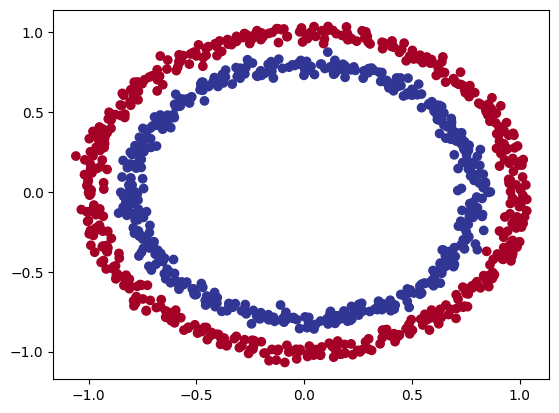

In [ ]:
# Visualize the data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


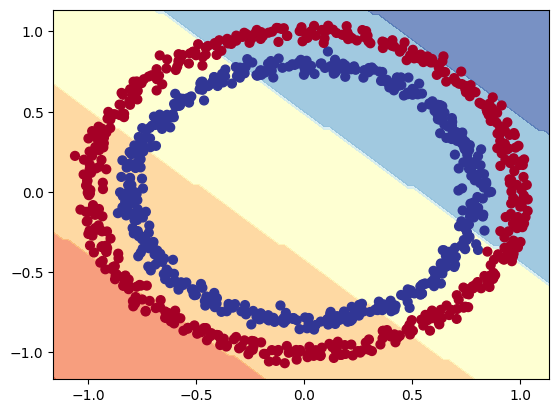

In [ ]:
plot_decision_boundary(model_4,X,y)

Let's try a neural network with non-linear function

In [ ]:
# Ranodm seed
tf.random.set_seed(42)

# Create the Model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1,activation=tf.keras.activations.relu)
])

# Compile the Model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(lr=0.001),metrics=['accuracy'])

# Fit the model
history = model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9301 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9048 - accuracy: 0.4830
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8880 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8673 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8290 - accuracy: 0.4820
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8399 - accuracy: 0.4820
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8109 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.8082 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7972 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.7846 - accuracy: 0.4830
Epoch 11/

Hmm... still not learning...

What we if increased the number of neurons and layers?

Say, 2 hidden layers, with ReLU, pronounced "rel-u", (short for rectified linear unit), activation on the first one, and 4 neurons each?

To see this network in action, check out the TensorFlow Playground demo.

multi-layer neural net created with TensorFlow playground The neural network we're going to recreate with TensorFlow code. See it live at TensorFlow Playground.

Let's try.

**Note:** in the course, Daniel used lr instead of learning_rate. But for the update, we had changed to learning_rate instead of lr.

In [ ]:
# Ranodm seed
tf.random.set_seed(42)

# Create the Model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1)
])

# Compile the Model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Fit the model
history = model_6.fit(X,y,epochs=300)


Epoch 1/300
32/32 [==============================] - 1s 2ms/step - loss: 2.6083 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 1.3420 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 1.1650 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 1.0736 - accuracy: 0.4990
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9955 - accuracy: 0.4660
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9115 - accuracy: 0.4360
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.8334 - accuracy: 0.4510
Epoch 8/300
32/32 [==============================] - 0s 2ms/step - loss: 0.8033 - accuracy: 0.4240
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 0.7887 - accuracy: 0.4210
Epoch 10/300
32/32 [==============================] - 0s 3ms/step - loss: 0.7786 - accuracy: 0.4260
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


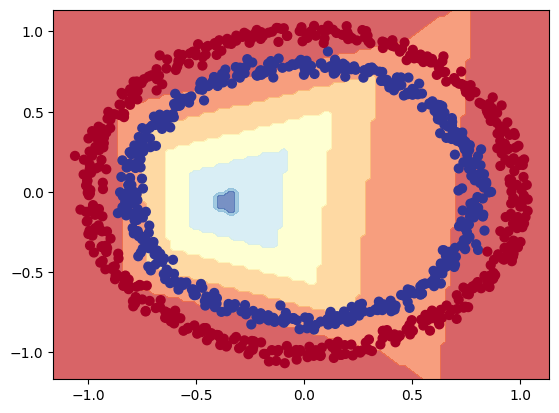

In [ ]:
plot_decision_boundary(model_6,X,y)

In [ ]:
# Ranodm seed
tf.random.set_seed(42)

# Create the Model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)
])

# Compile the Model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Fit the model
history = model_7.fit(X,y,epochs=150)


Epoch 1/150
32/32 [==============================] - 3s 5ms/step - loss: 0.7024 - accuracy: 0.5020
Epoch 2/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6999 - accuracy: 0.4950
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.4870
Epoch 4/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.4810
Epoch 5/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6957 - accuracy: 0.4650
Epoch 6/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.4360
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4700
Epoch 8/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4770
Epoch 9/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6921 - accuracy: 0.4830
Epoch 10/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.4750
Epoch 11/

In [ ]:
# Evaluate the Model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.1475 - accuracy: 0.9830


[0.14750447869300842, 0.9829999804496765]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


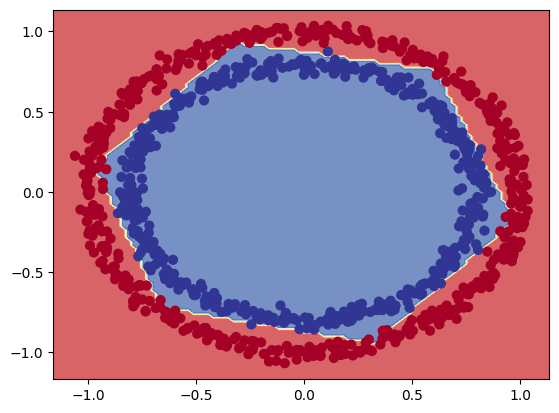

In [ ]:
plot_decision_boundary(model_7,X,y)

Nice! It looks like our model is almost perfectly (apart from a few examples) separating the two circles.

🤔 **Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 **Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Think of it like this:

If I gave you an unlimited amount of straight lines and non-straight lines, what kind of patterns could you draw?

That's essentially what neural networks do to find patterns in data.

Now you might be thinking, "but I haven't seen a linear function or a non-linear function before..."

Oh but you have.

We've been using them the whole time.

They're what power the layers in the models we just built.

To get some intuition about the activation functions we've just used, let's create them and then try them on some toy data.

In [ ]:
# Create a toy tensor
A = tf.cast(tf.range(-10,10),tf.float32)

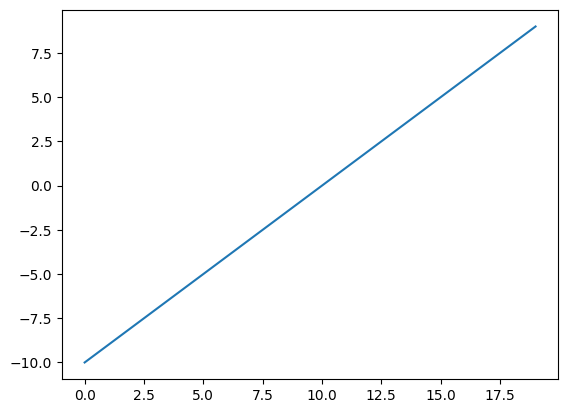

In [ ]:
plt.plot(A)

In [ ]:
# Creating the sigmoid function
def sigmoid(x):
  return 1 / (1+tf.exp(-x))


In [ ]:
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

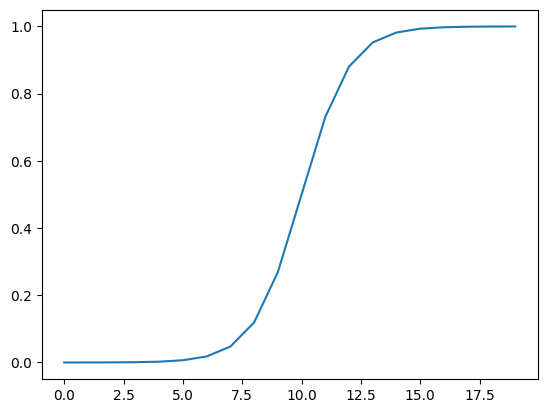

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
# Let's create the Relu function
def relu(x):
  return tf.maximum(0,x)

In [ ]:
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

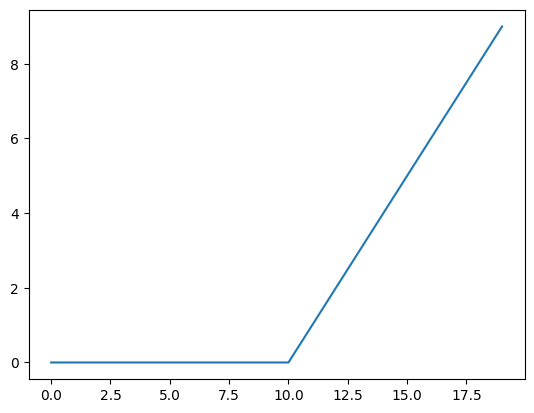

In [ ]:
plt.plot(relu(A))

In [ ]:
# Let's try linear functions
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

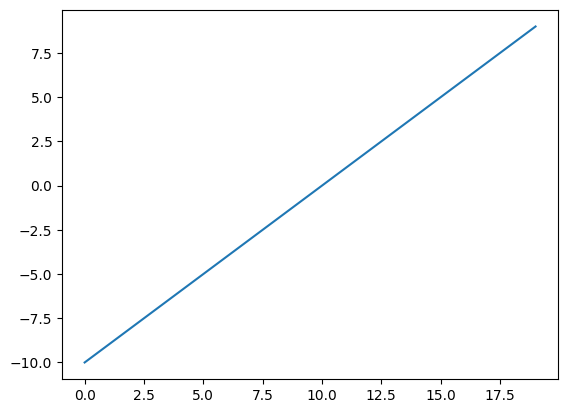

In [ ]:
plt.plot(tf.keras.activations.linear(A))

In [ ]:
# Does linear activation function change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Evaluating and Improving our Classification Model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# 1
tf.random.set_seed(42)
# 2
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)
])

#3
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),metrics=['accuracy'])

#
history = model_8.fit(X_train,y_train,epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6894 - accuracy: 0.5250
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6756 - accuracy: 0.5975
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.7212
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6321 - accuracy: 0.7337
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6114 - accuracy: 0.6862
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5721 - accuracy: 0.7725
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.8012
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8325
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4357 - accuracy: 0.8687
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4170 - accuracy: 0.8438
Epoch 11/

In [ ]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1028 - accuracy: 0.9650


[0.10275159776210785, 0.9649999737739563]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


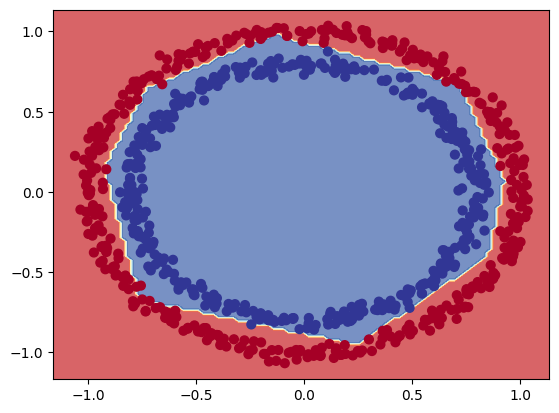

In [ ]:
plot_decision_boundary(model_8,X_train,y_train)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


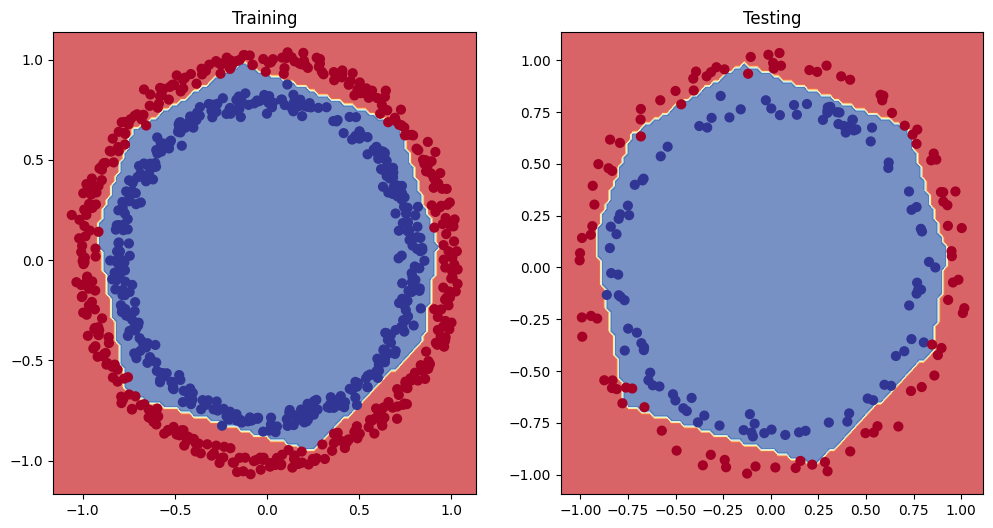

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Testing')
plot_decision_boundary(model_8,X_test,y_test)
plt.show();